# Getting real about Fake News | Kaggle

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df = pd.read_csv('data/data.csv')

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(12999, 20)

Overview of the data:

In [6]:
df.head()

uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \nFox News Sunday reported this mo...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US      25689.0   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US      25689.0   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US      25689.0   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US      25689.0   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US      25689.0   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
3  http://100percentfedup.com/wp-content/uploads/...              0   
4  http://100percentfedup.com/wp-content/uploads/...              0   

   participants_count  likes  comments  shares  type  
0                   1      0         0       0  bias  
1                   1      0         0       0  bias  
2                   1      0         0       0  bias  
3                   0      0         0       0  bias  
4                   0      0         0       0  bias

### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
dtype: object

### Basic characteristics

In [8]:
df.describe()

ord_in_thread   domain_rank    spam_score  replies_count  \
count   12999.000000   8776.000000  12999.000000   12999.000000   
mean        0.891530  38092.996582      0.026122       1.383183   
std         6.486822  26825.487454      0.122889       9.656838   
min         0.000000    486.000000      0.000000       0.000000   
25%         0.000000  17423.000000      0.000000       0.000000   
50%         0.000000  34478.000000      0.000000       0.000000   
75%         0.000000  60570.000000      0.000000       0.000000   
max       100.000000  98679.000000      1.000000     309.000000   

       participants_count         likes      comments        shares  
count        12999.000000  12999.000000  12999.000000  12999.000000  
mean             1.727518     10.831833      0.038311     10.831833  
std              6.884239     79.798949      0.827335     79.798949  
min              0.000000      0.000000      0.000000      0.000000  
25%              1.000000      0.000000      0.000000      0.000000  
50%              1.000000      0.000000      0.000000      0.000000  
75%              1.000000      0.000000      0.000000      0.000000  
max            240.000000    988.000000     65.000000    988.000000

In [9]:
df.describe(exclude=[np.number])

uuid author  \
count                                      12999  10575   
unique                                     12999   2259   
top     f7a5e14cd157d9c6d3c9e178df9a962cf8763bbe  admin   
freq                                           1    247   

                            published  \
count                           12999   
unique                          11973   
top     2016-10-27T03:00:00.000+03:00   
freq                               59   

                                                    title   text language  \
count                                               12319  12953    12999   
unique                                              11698  12431       16   
top     Get Ready For Civil Unrest: Survey Finds That ...         english   
freq                                                    7    106    12403   

                              crawled             site_url country  \
count                           12999                12999   12823   
unique                          12997                  244      24   
top     2016-11-08T01:28:01.428+02:00  thedailysheeple.com      US   
freq                                2                  100   10367   

                                             thread_title  \
count                                               12987   
unique                                              11788   
top     WH Press Secretary Says Obama's Denial About C...   
freq                                                   44   

                                             main_img_url   type  
count                                                9356  12999  
unique                                               7684      8  
top     http://www.fromthetrenchesworldreport.com/wp-c...     bs  
freq                                                  100  11492

### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

author: 2424 (18.65%)
title: 680 (5.23%)
text: 46 (0.35%)
country: 176 (1.35%)
domain_rank: 4223 (32.49%)
thread_title: 12 (0.09%)
main_img_url: 3643 (28.03%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


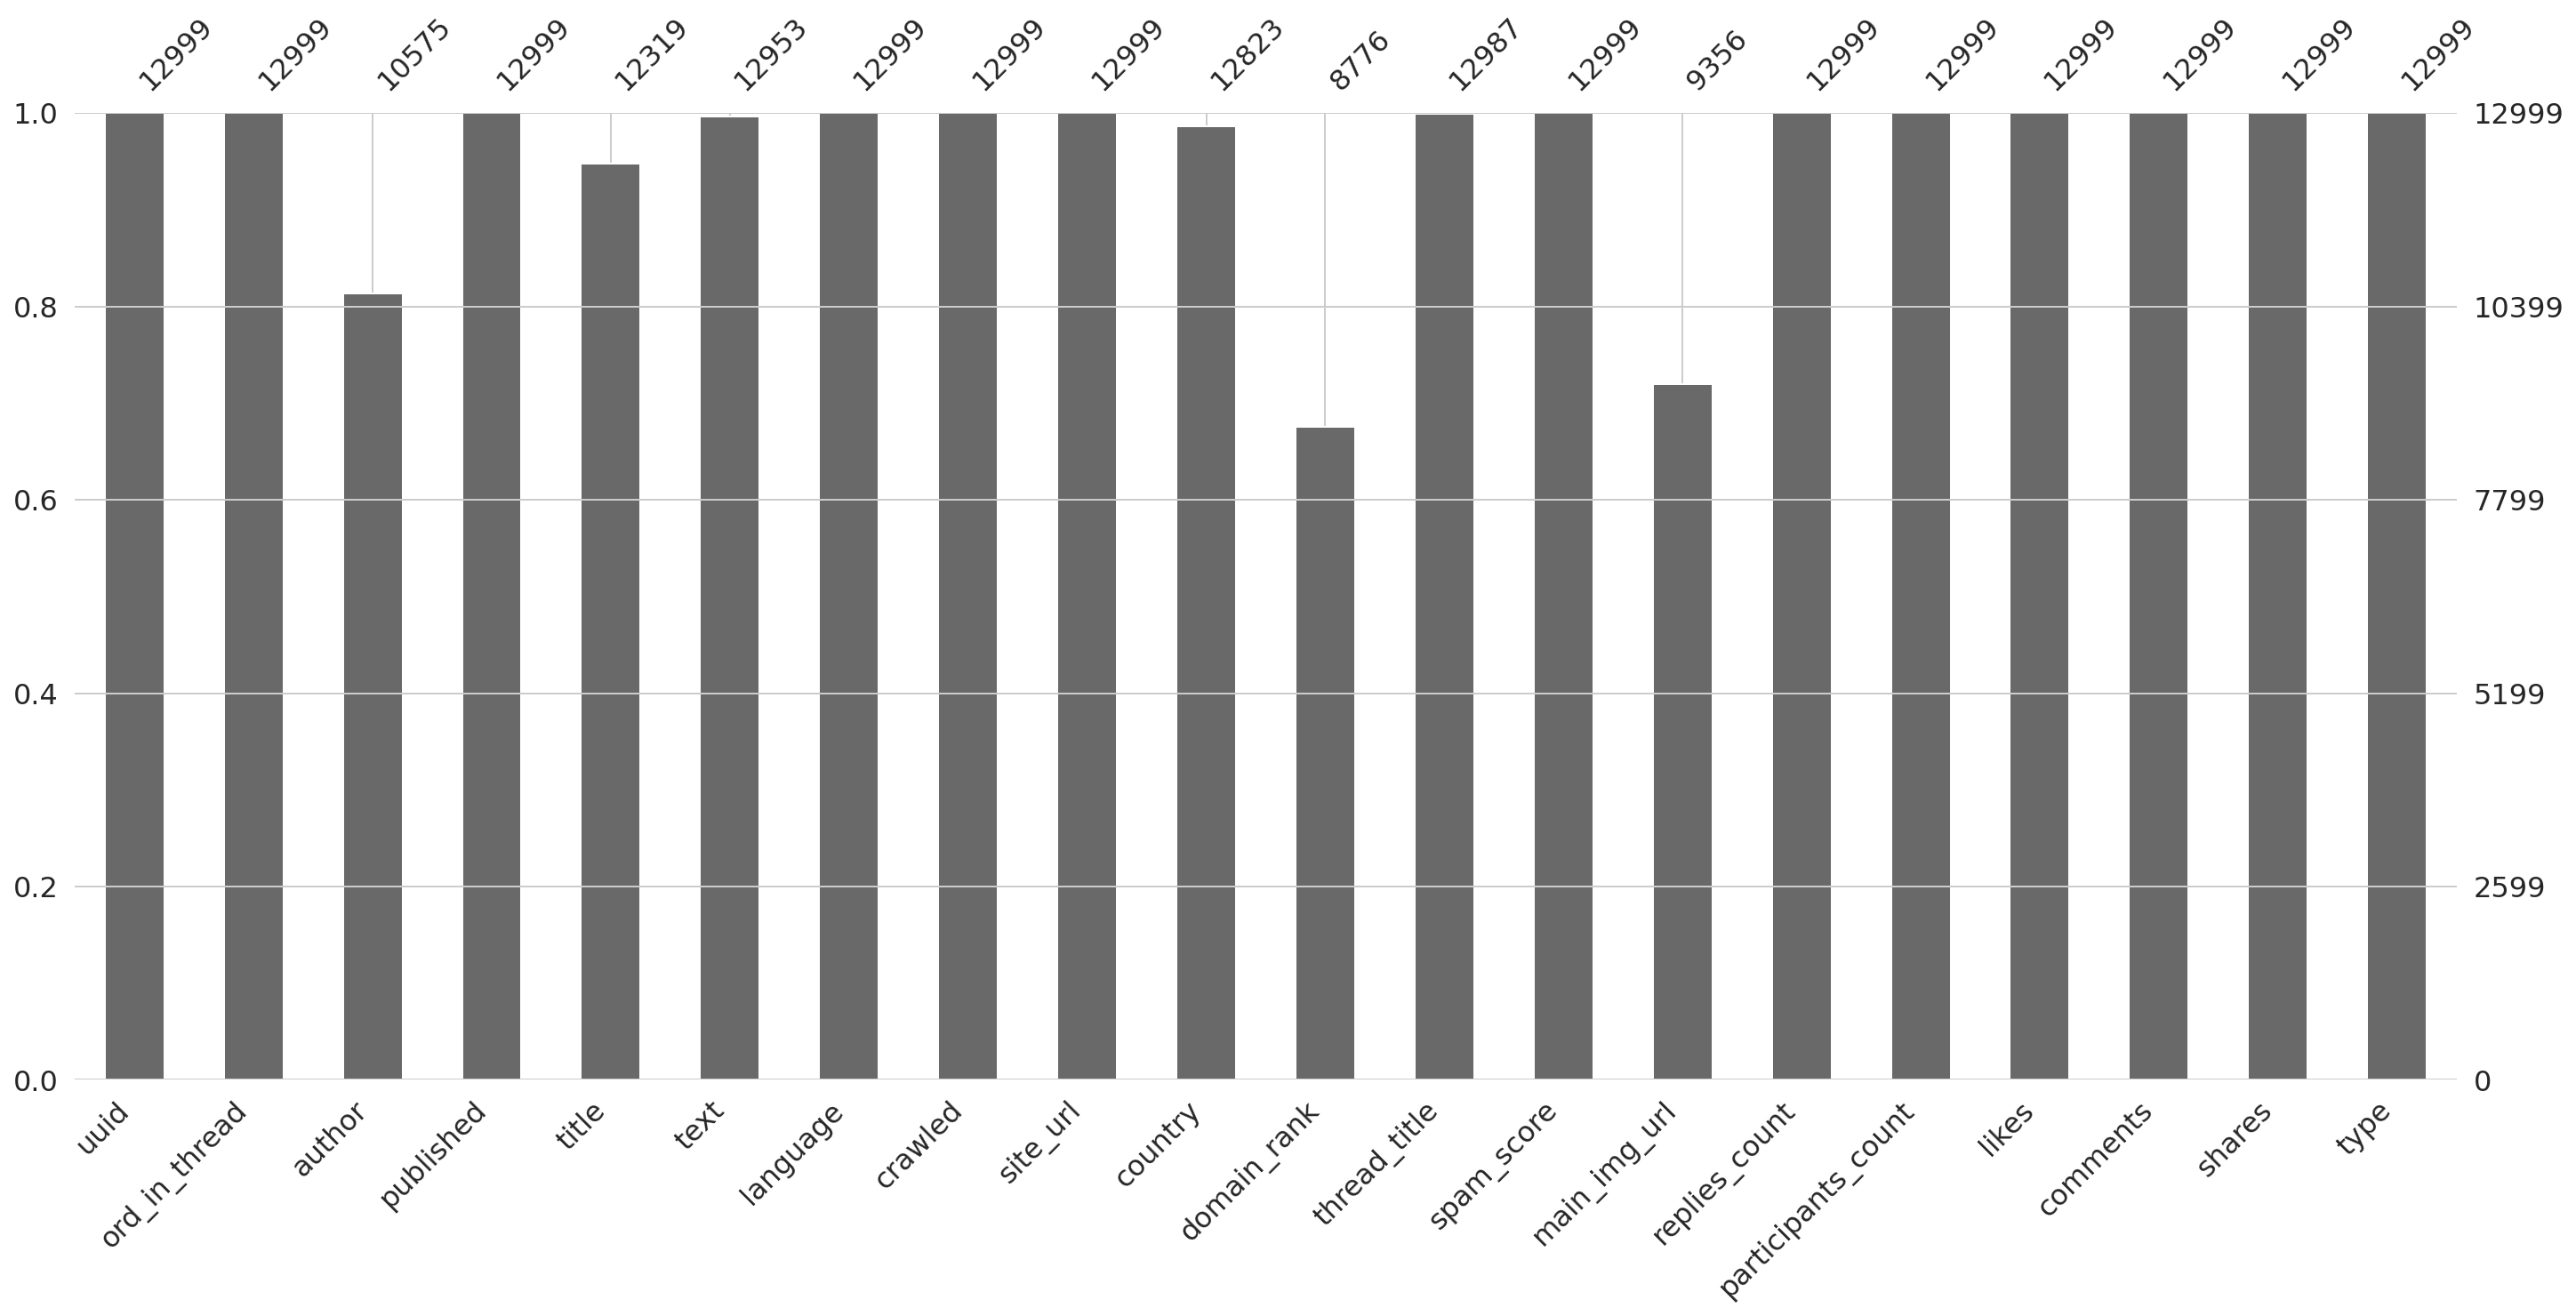

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'uuid', 'ord_in_thread', 'published', 'crawled', 'main_img_url'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'title', 'text', 'site_url', 'thread_title'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'type' # attribute considered as "label"

### Label attribute distribution

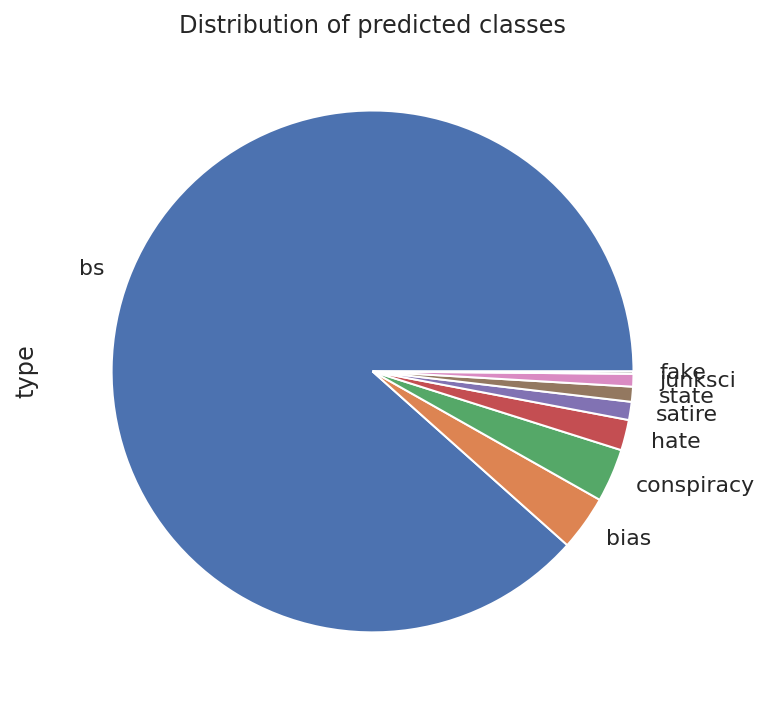

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

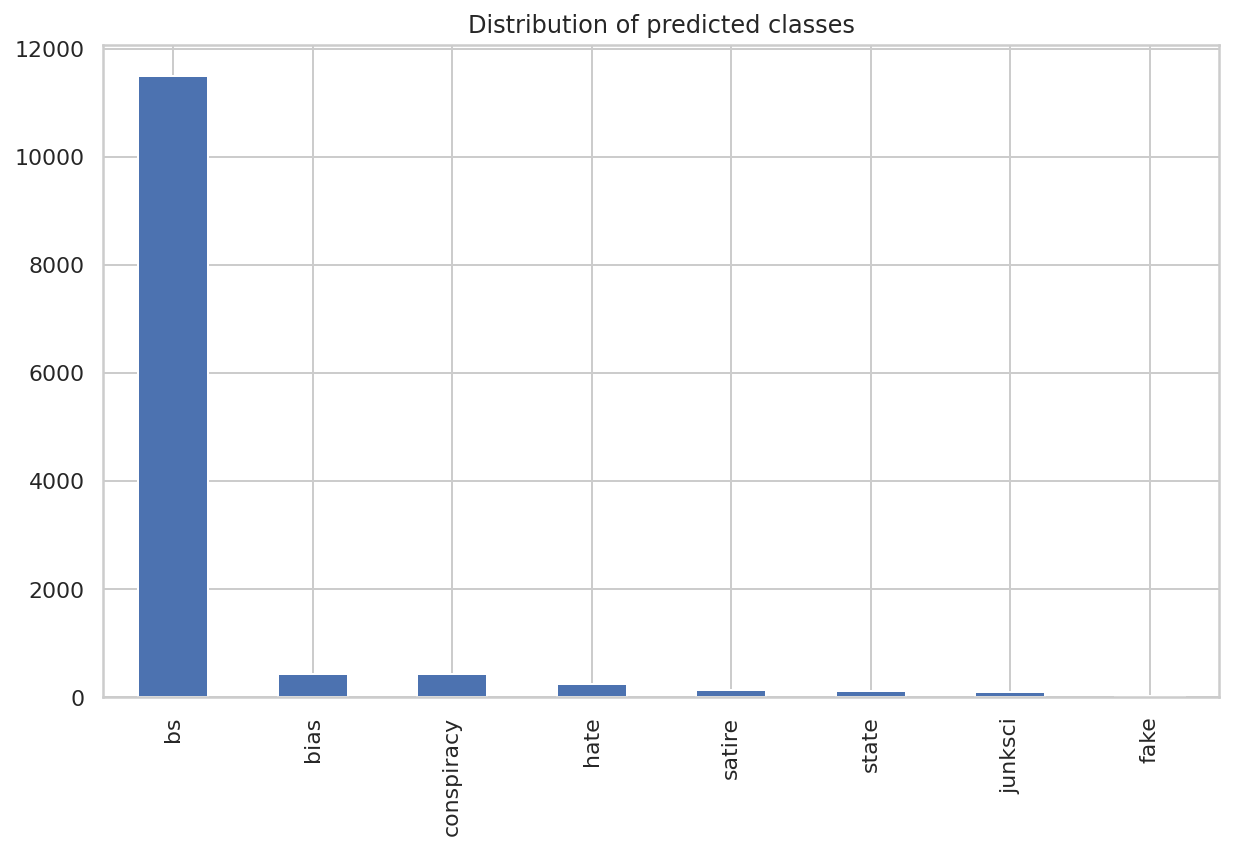

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "domain_rank"


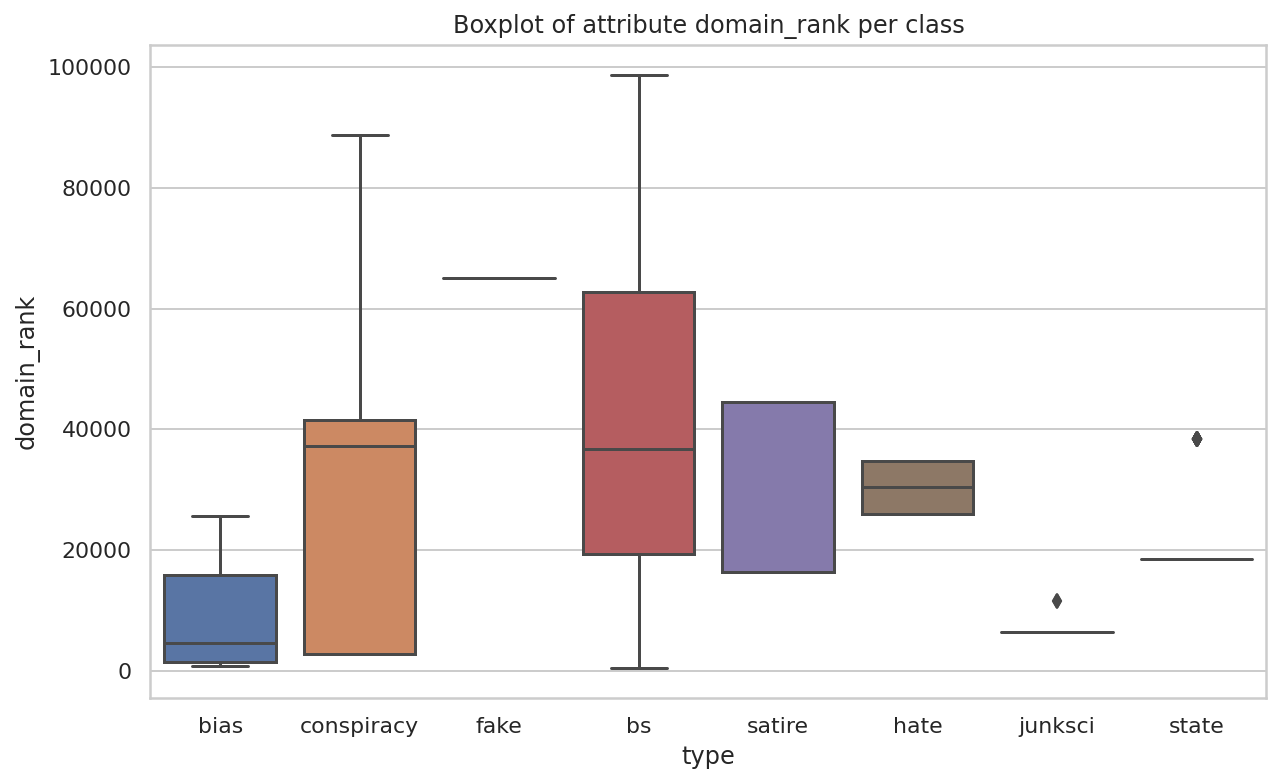



Analysis of attribute "spam_score"


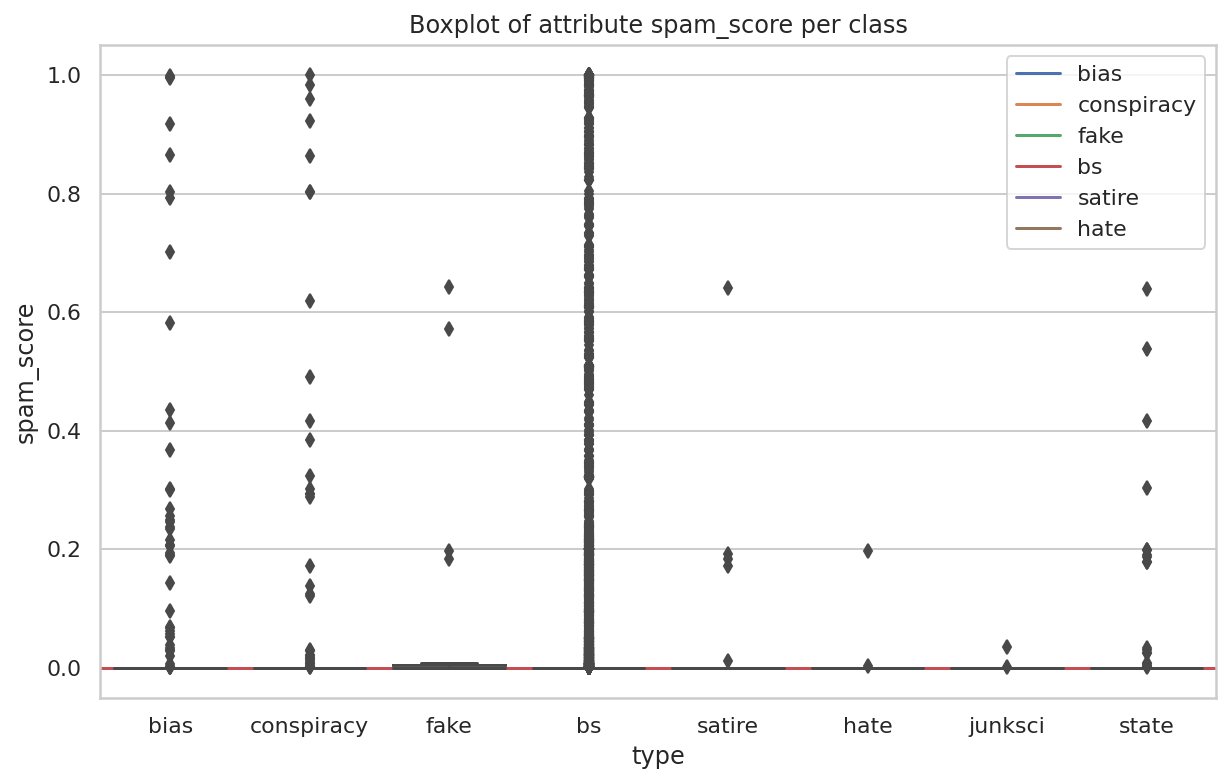



Analysis of attribute "replies_count"


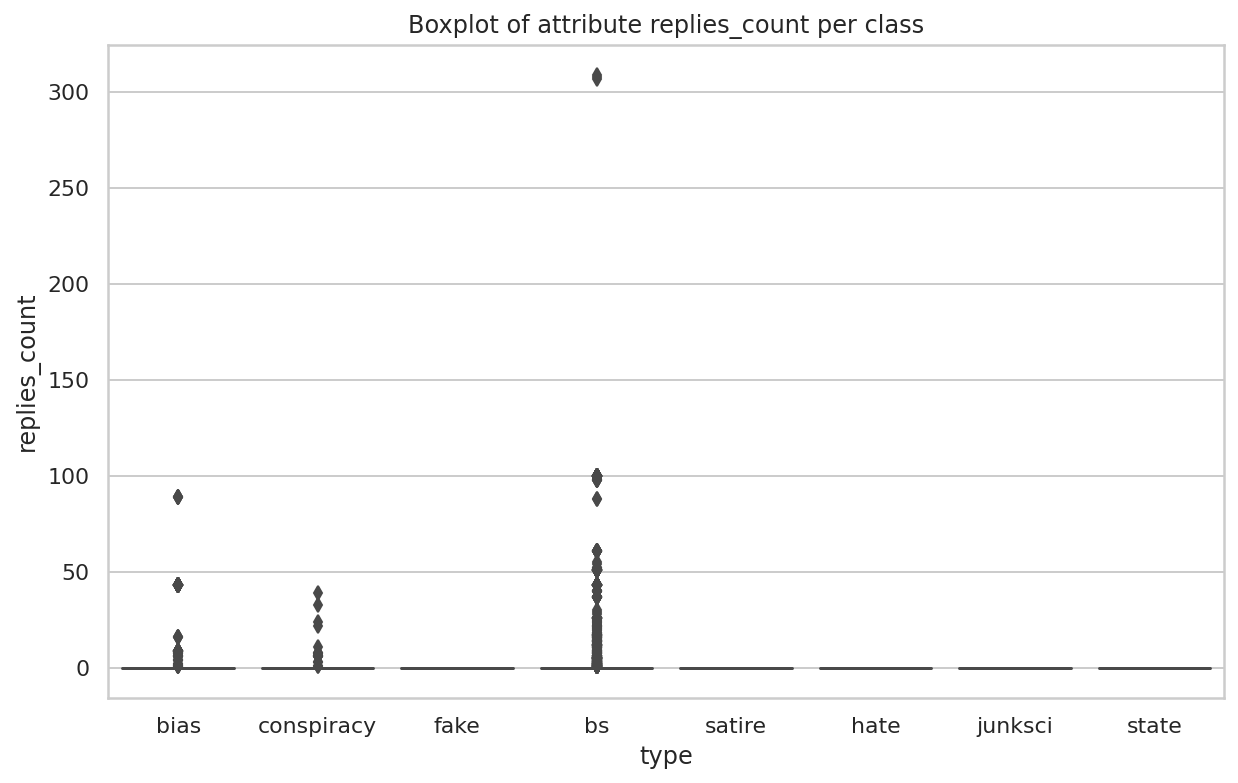



Analysis of attribute "participants_count"


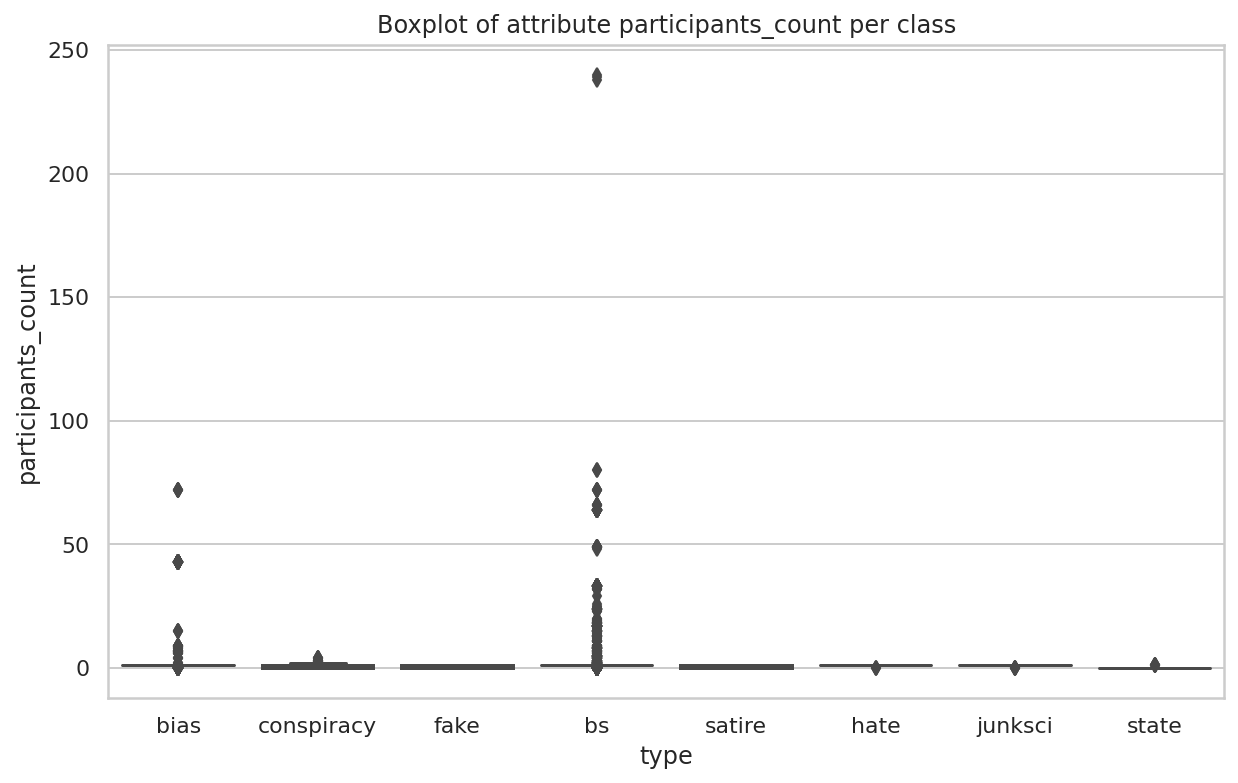



Analysis of attribute "likes"


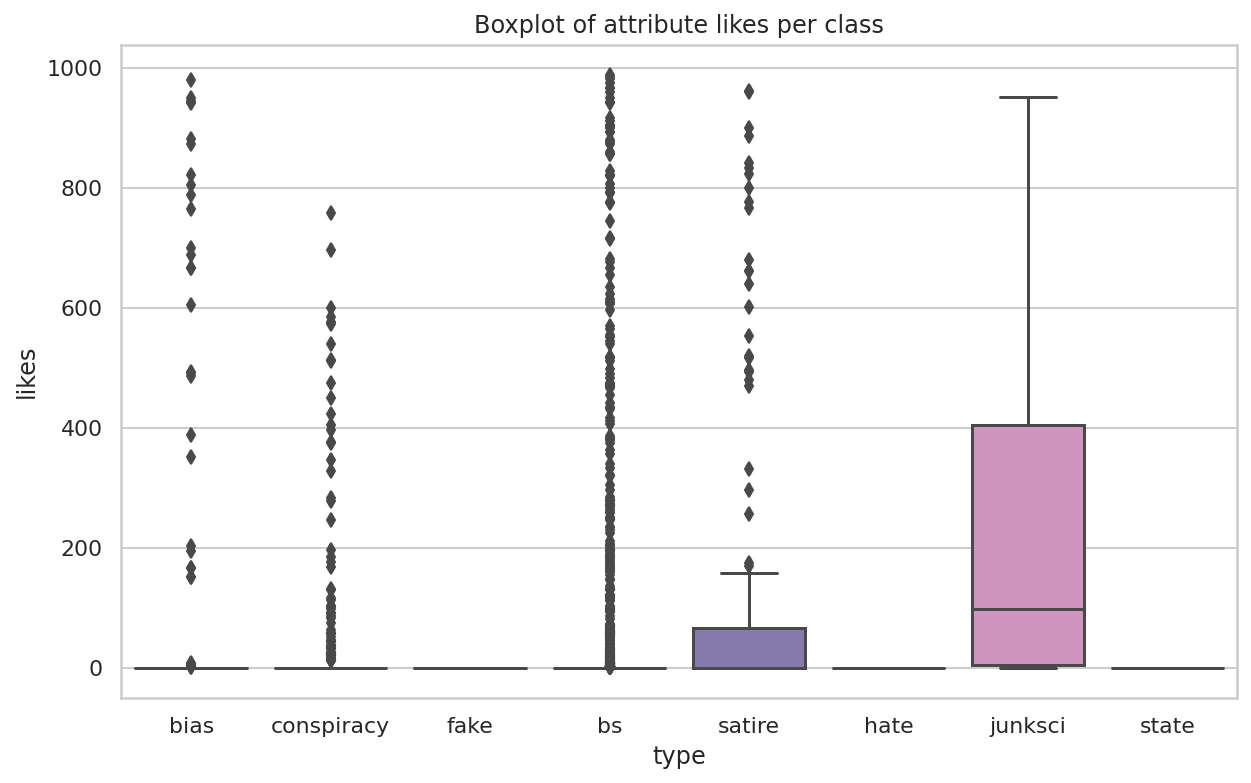



Analysis of attribute "comments"


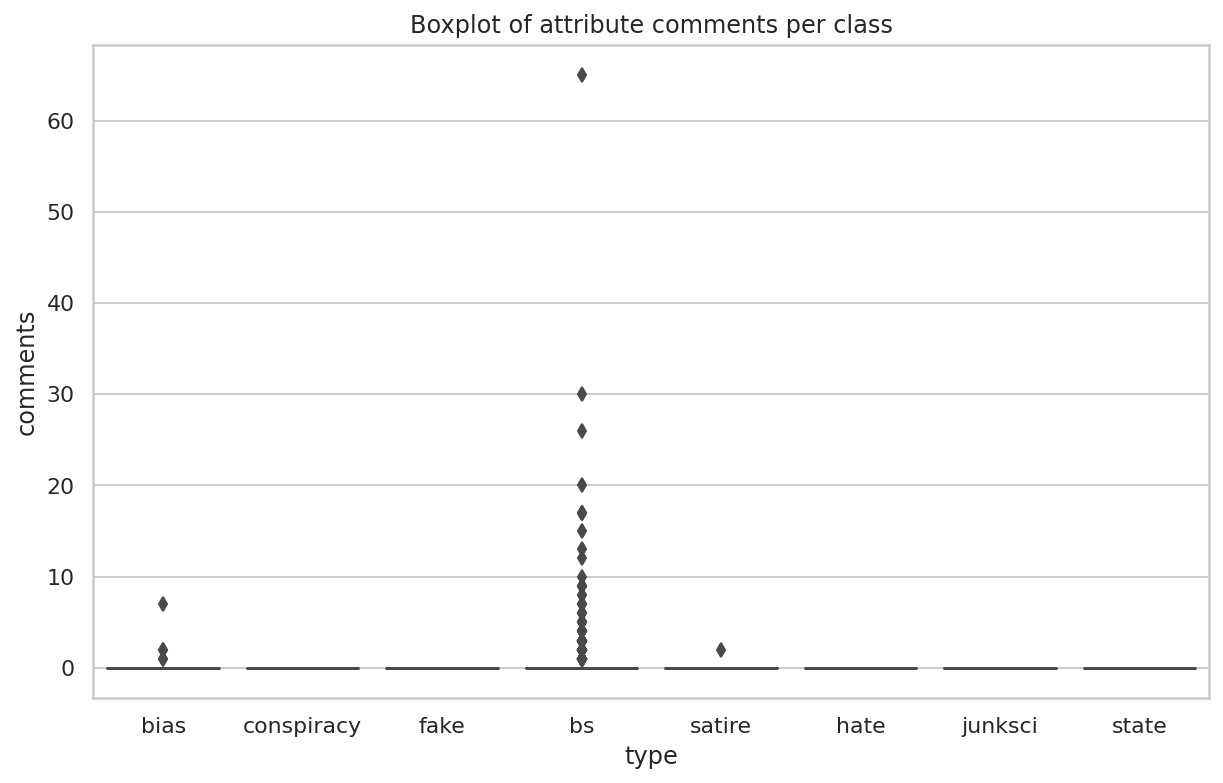



Analysis of attribute "shares"


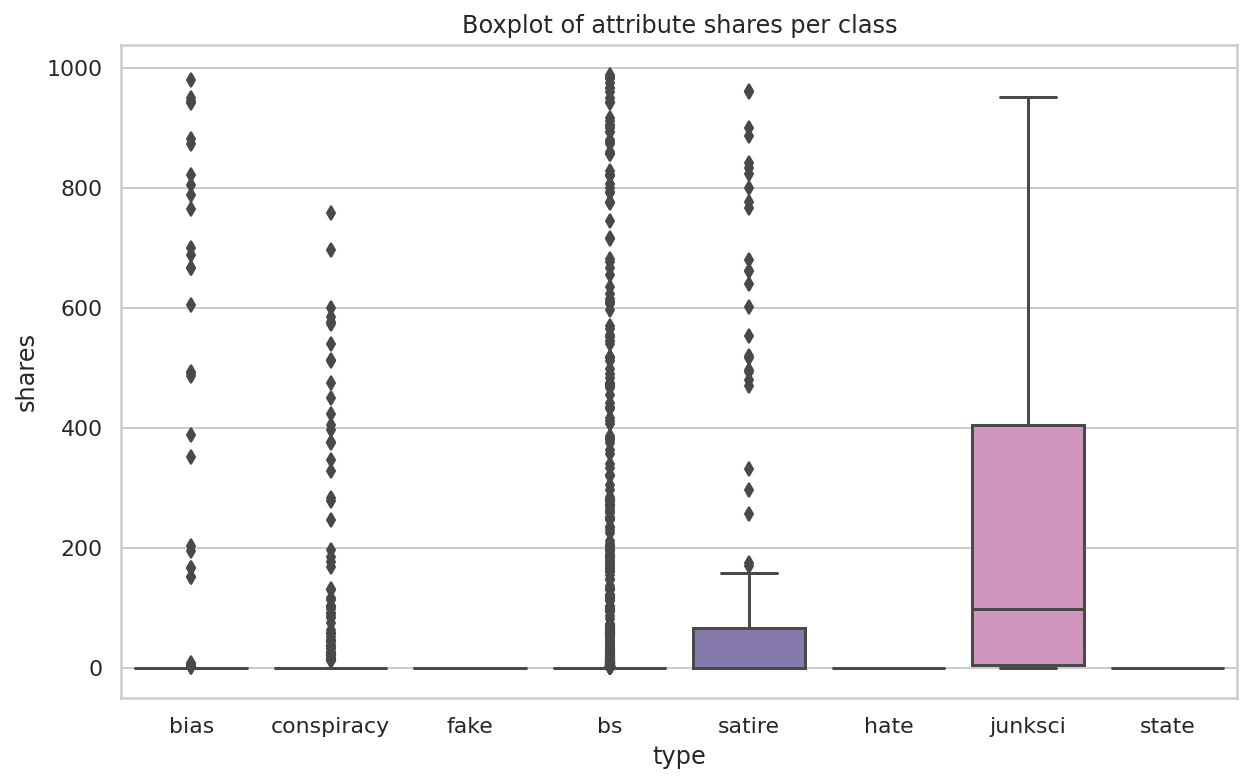

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "author"


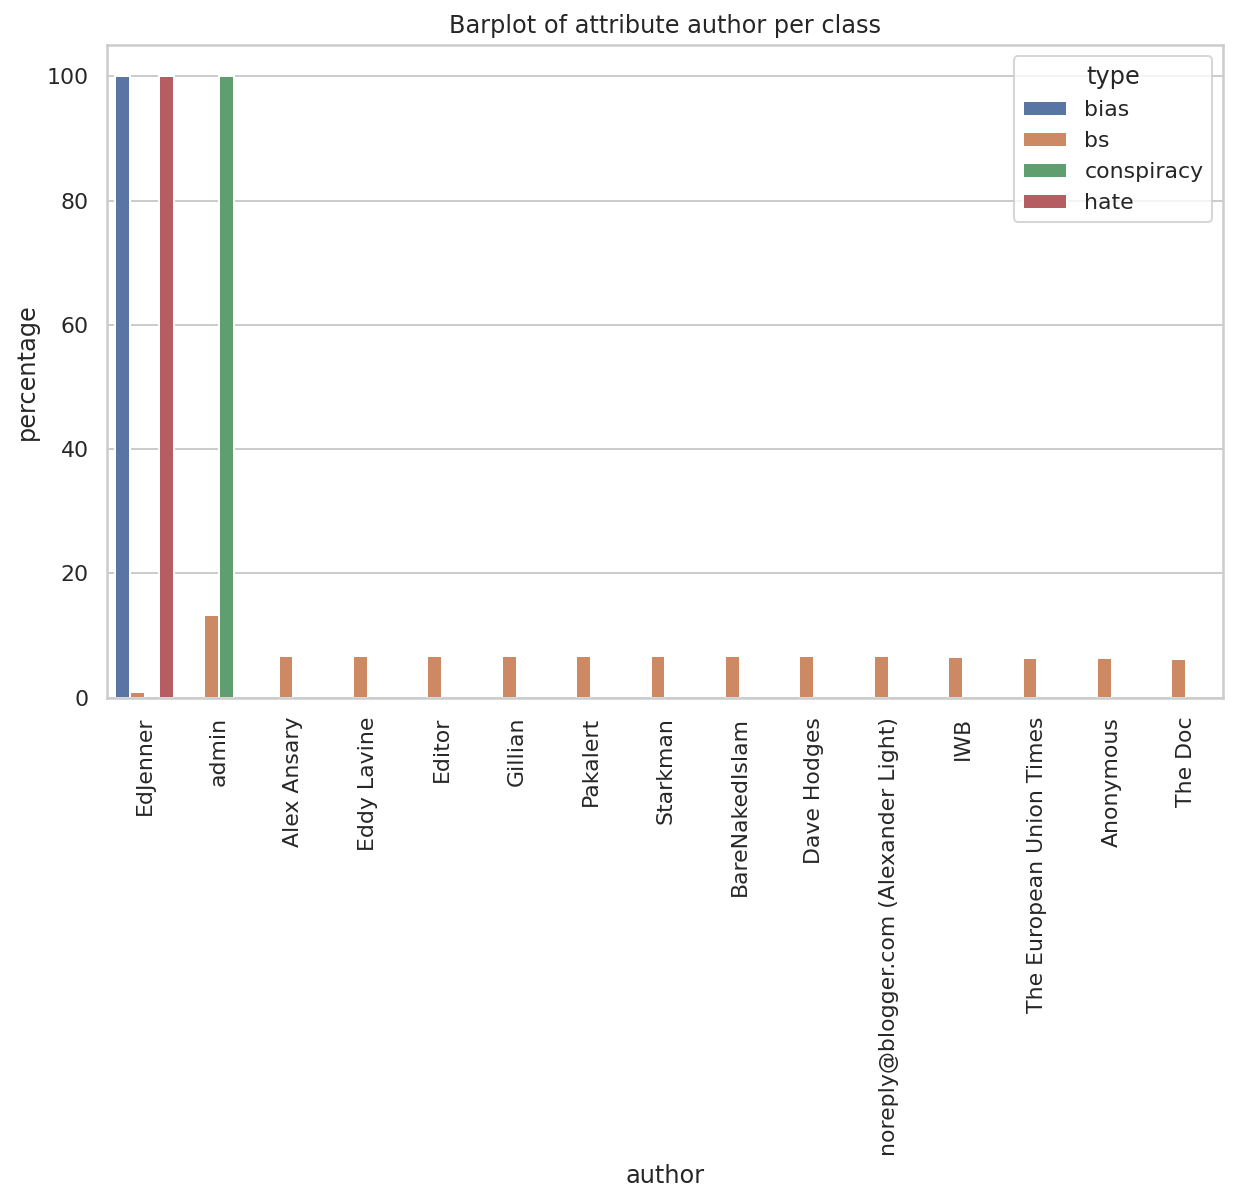



Analysis of attribute "language"


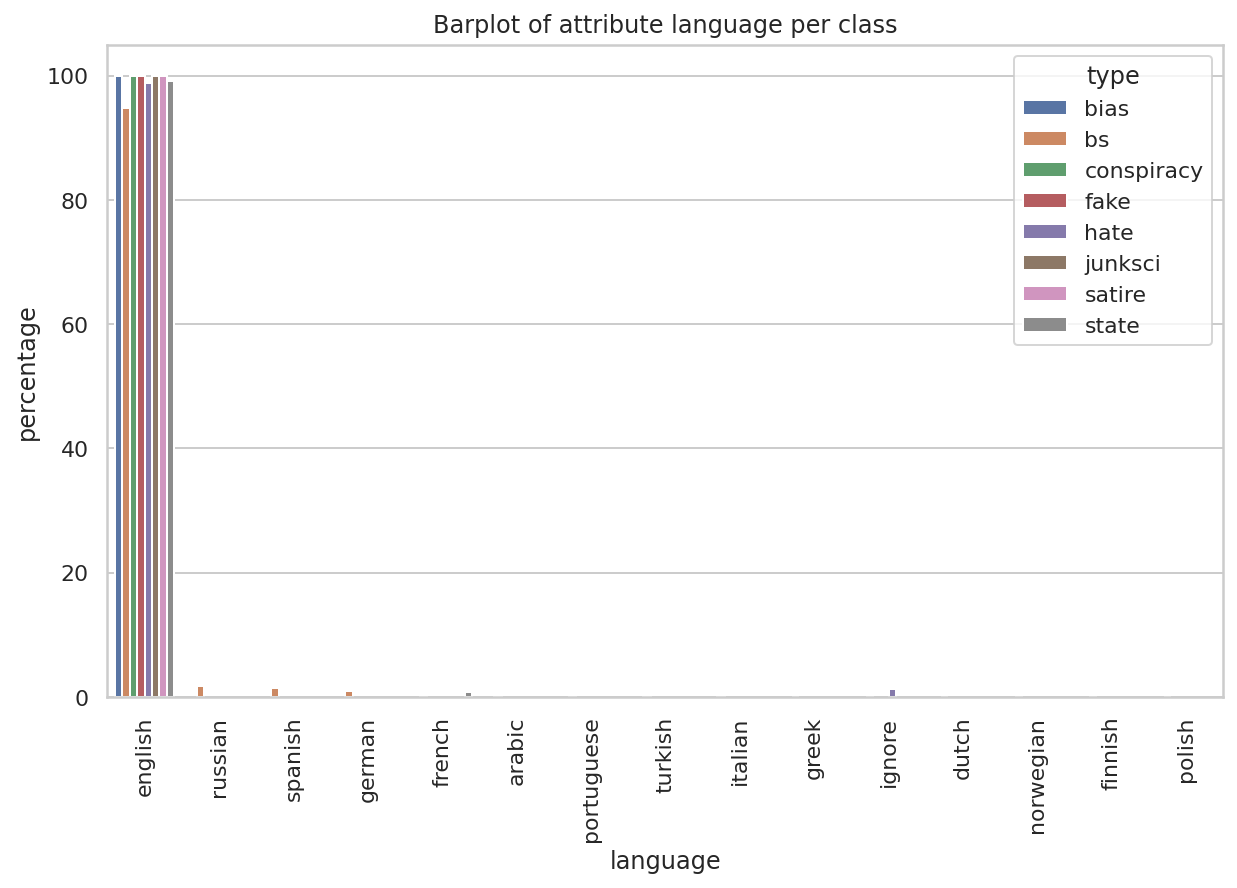



Analysis of attribute "country"


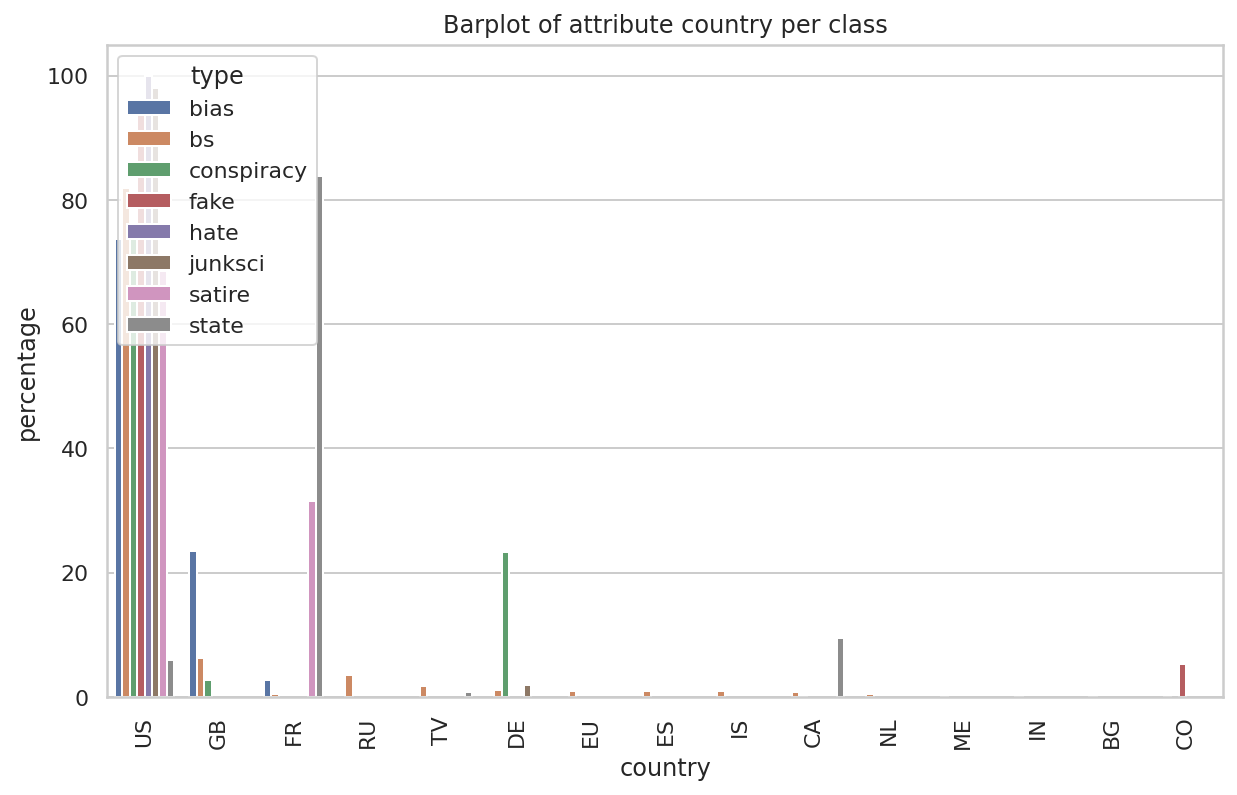

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "title"


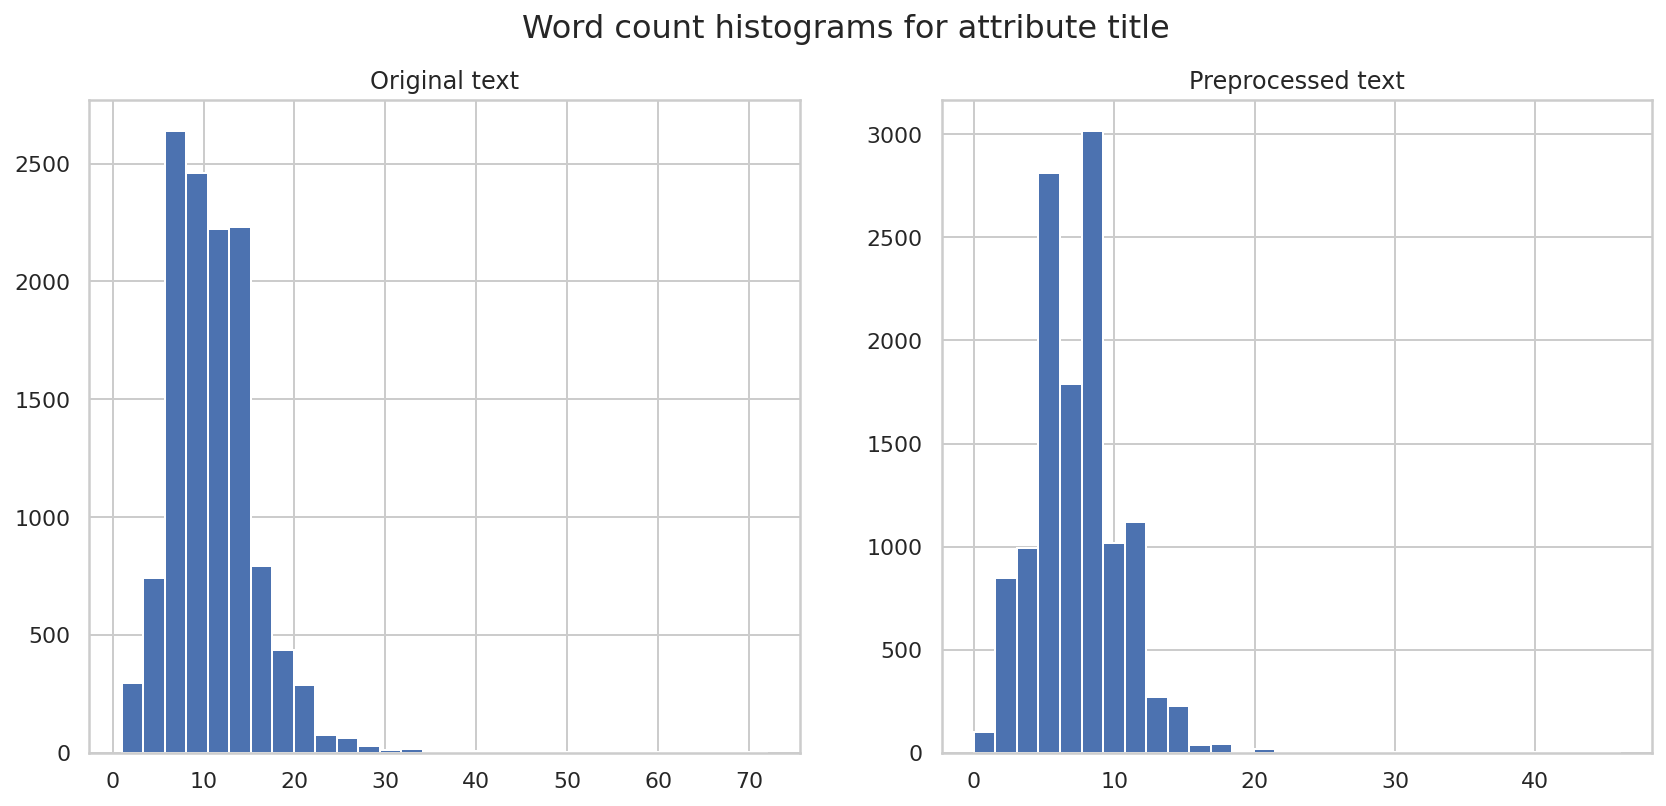

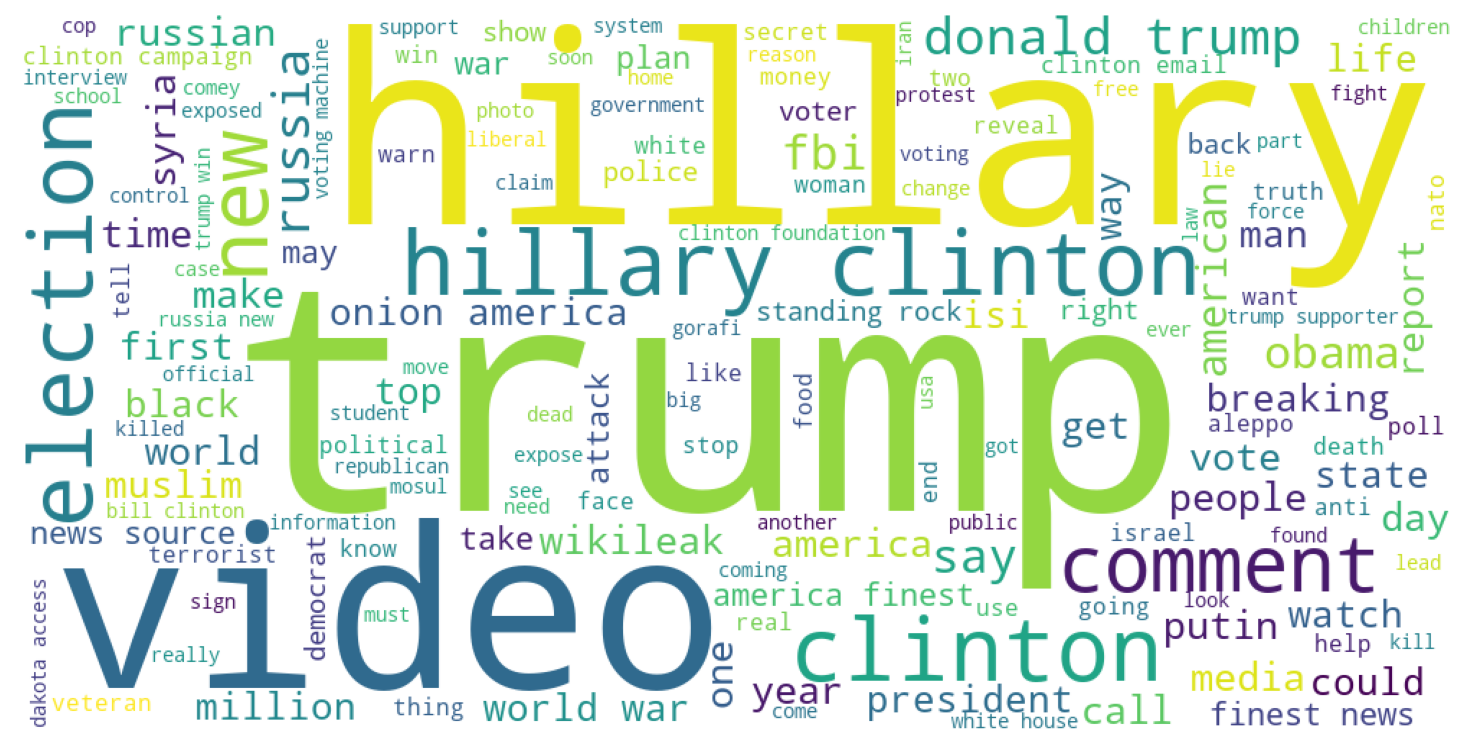



Analysis of attribute "text"


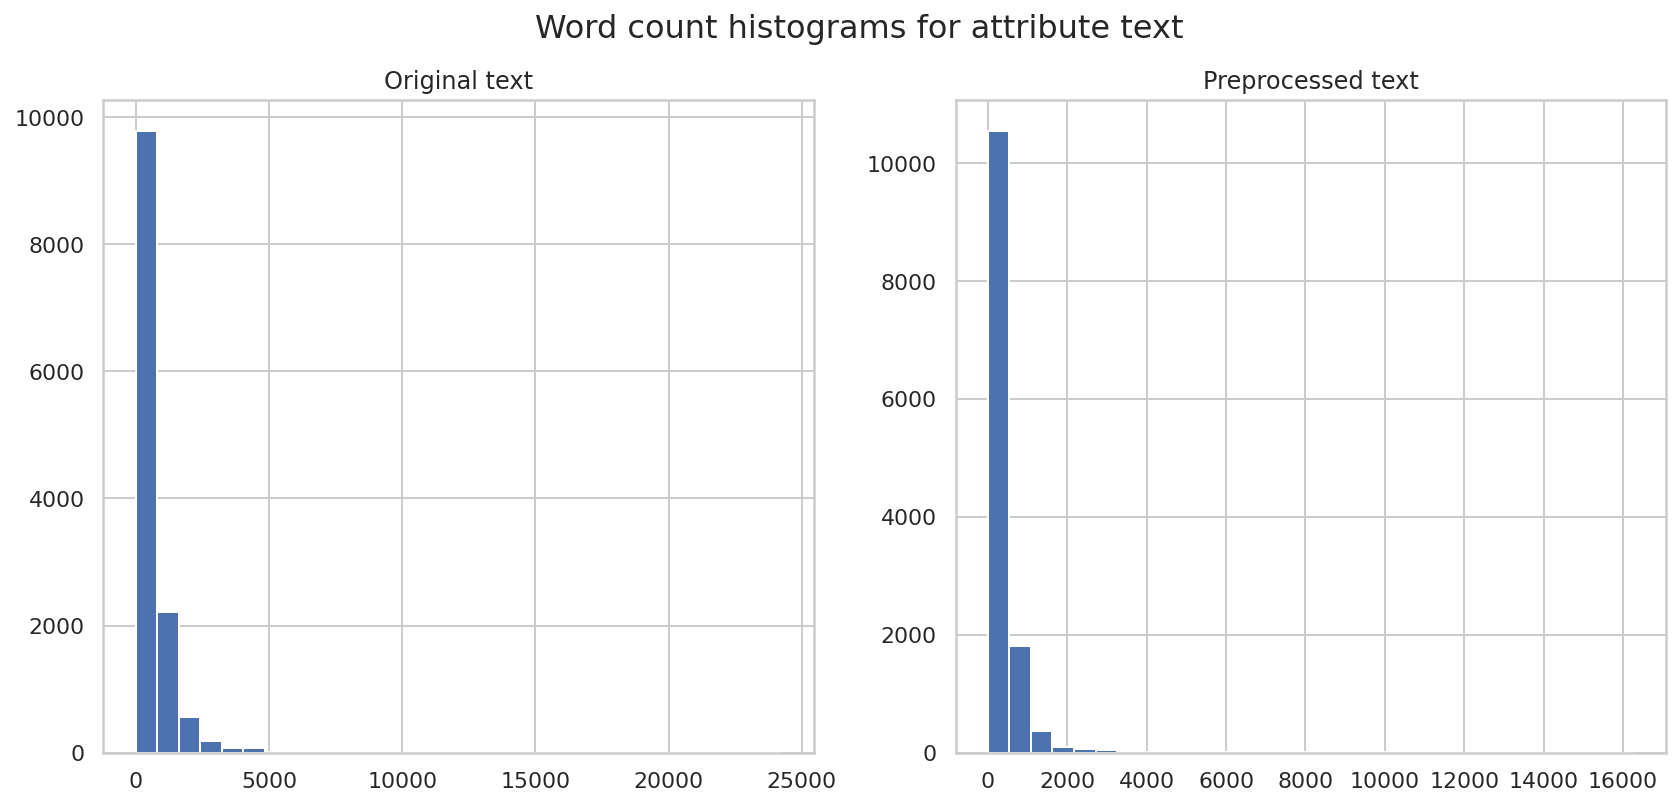

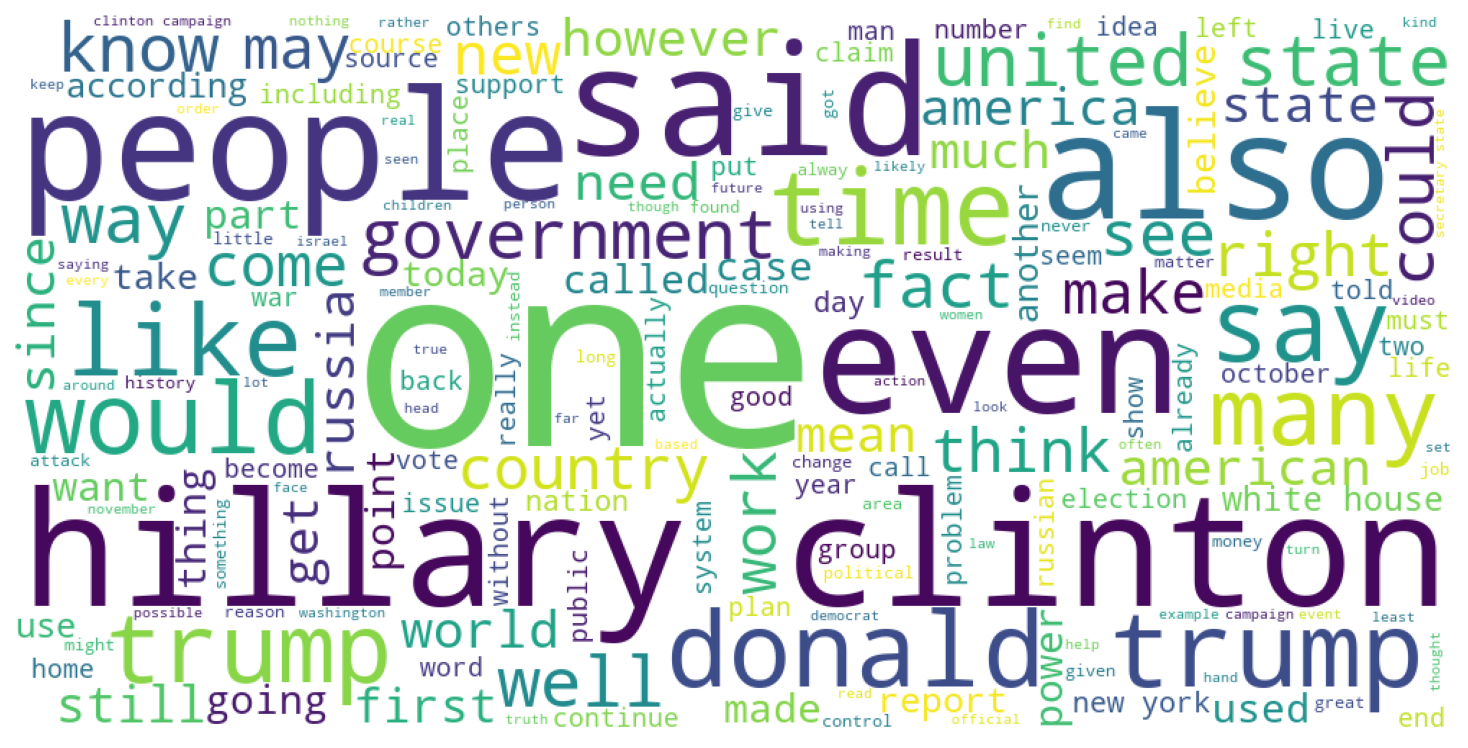



Analysis of attribute "site_url"


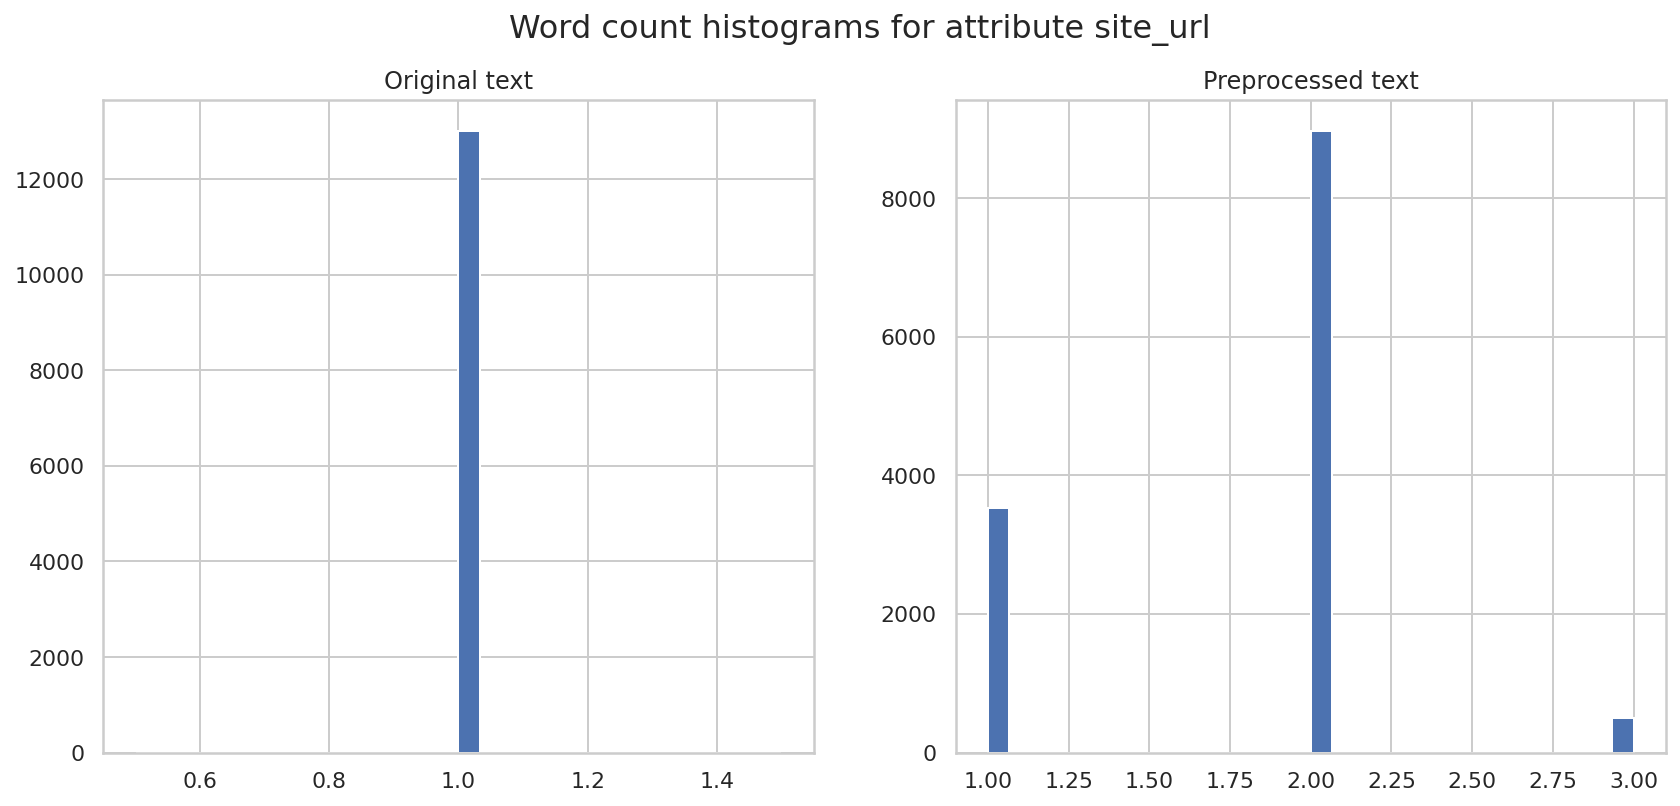

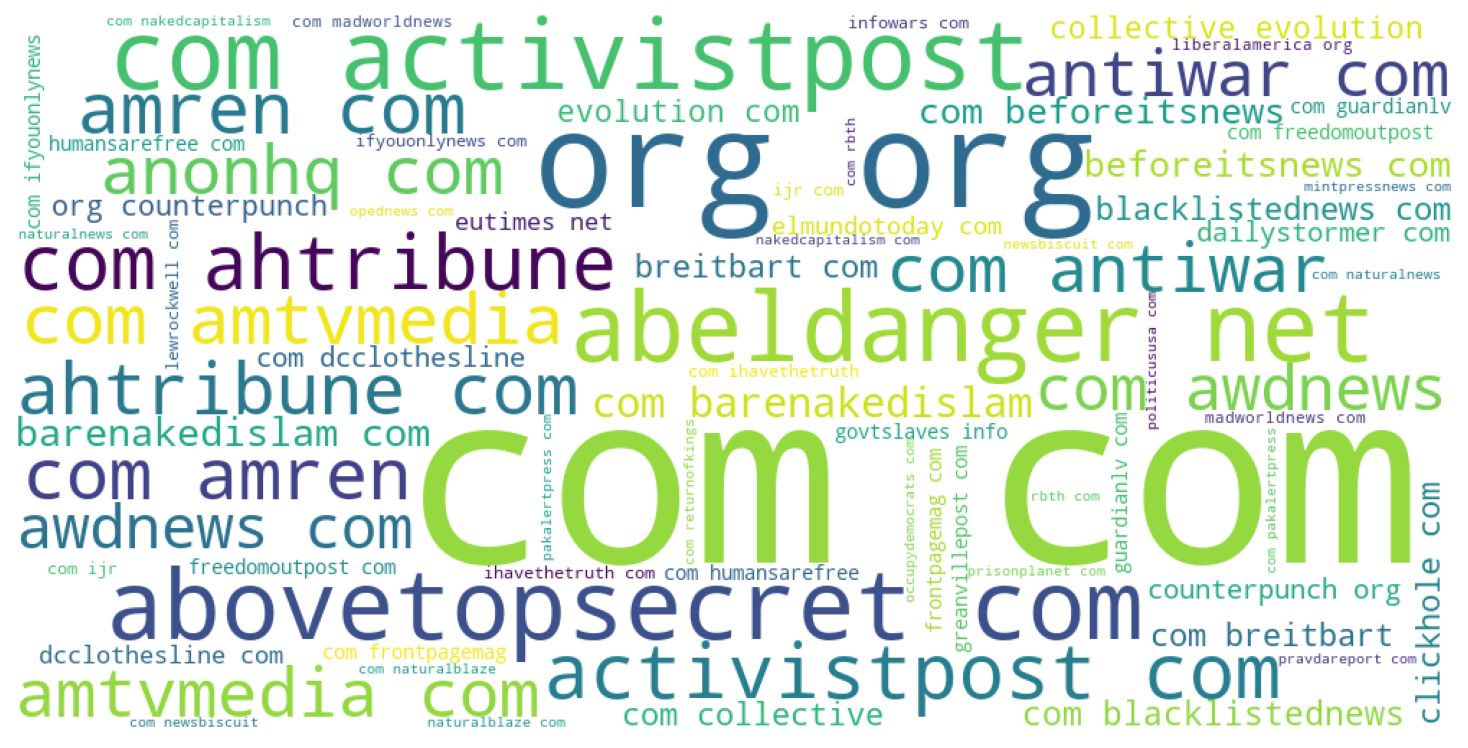



Analysis of attribute "thread_title"


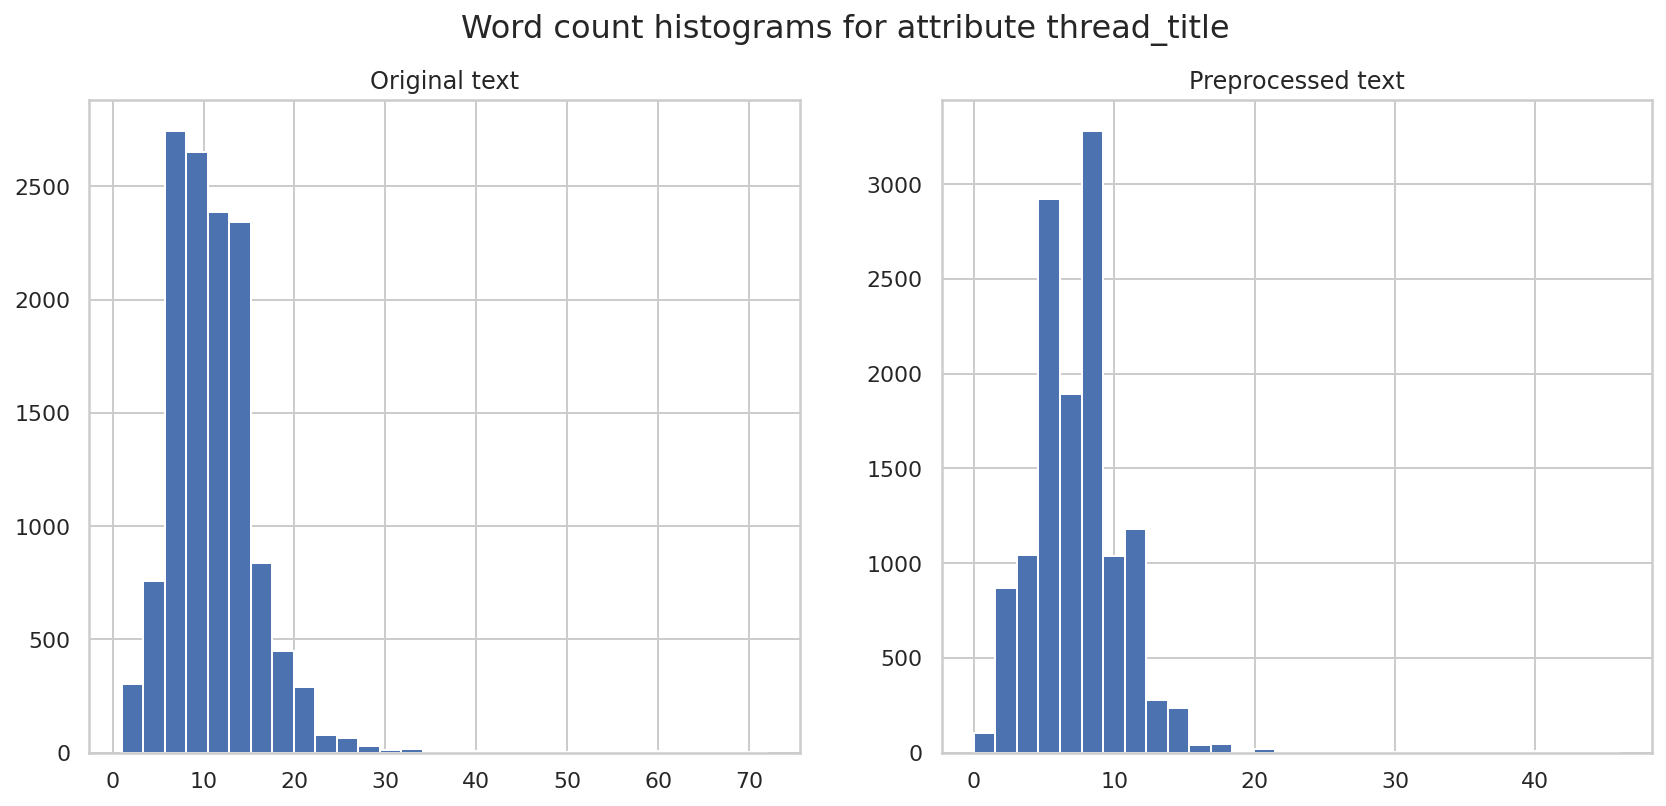

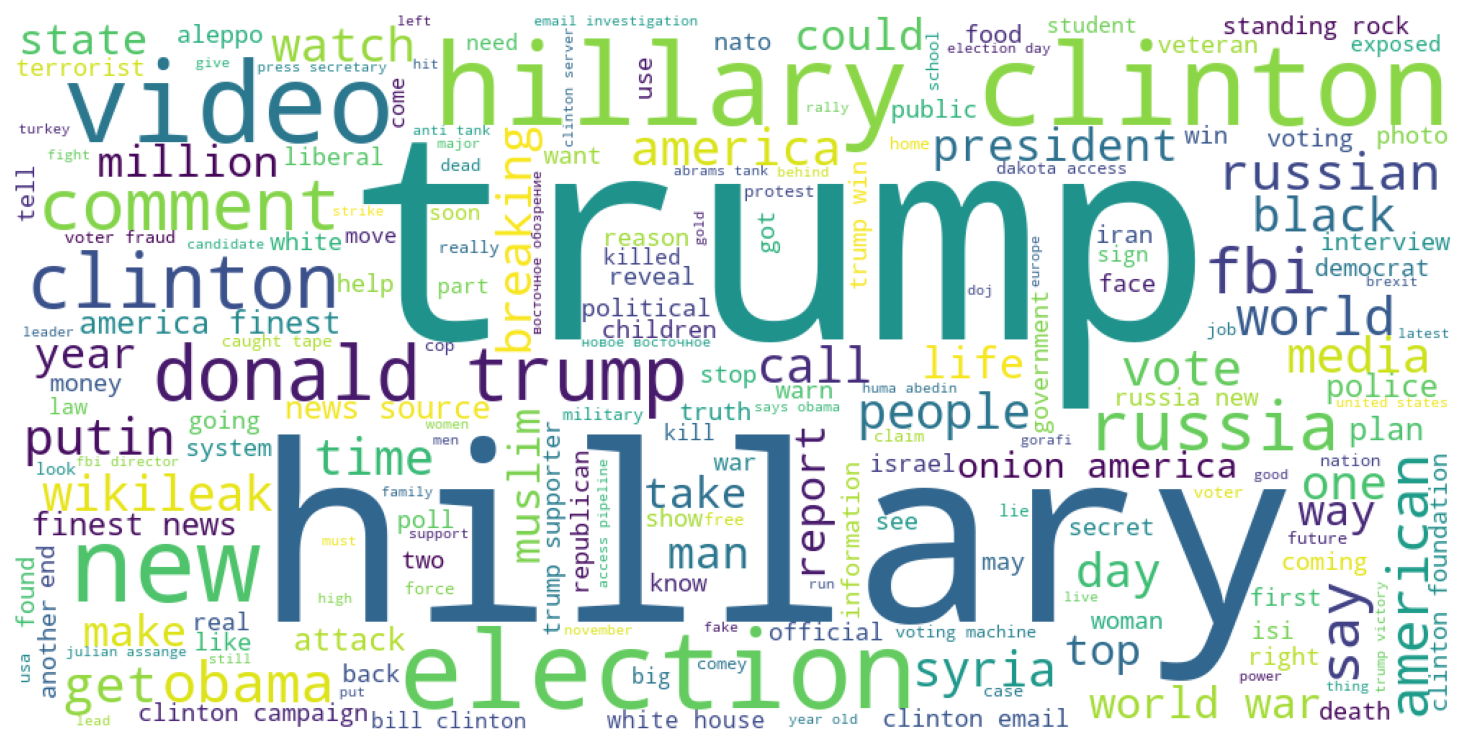

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

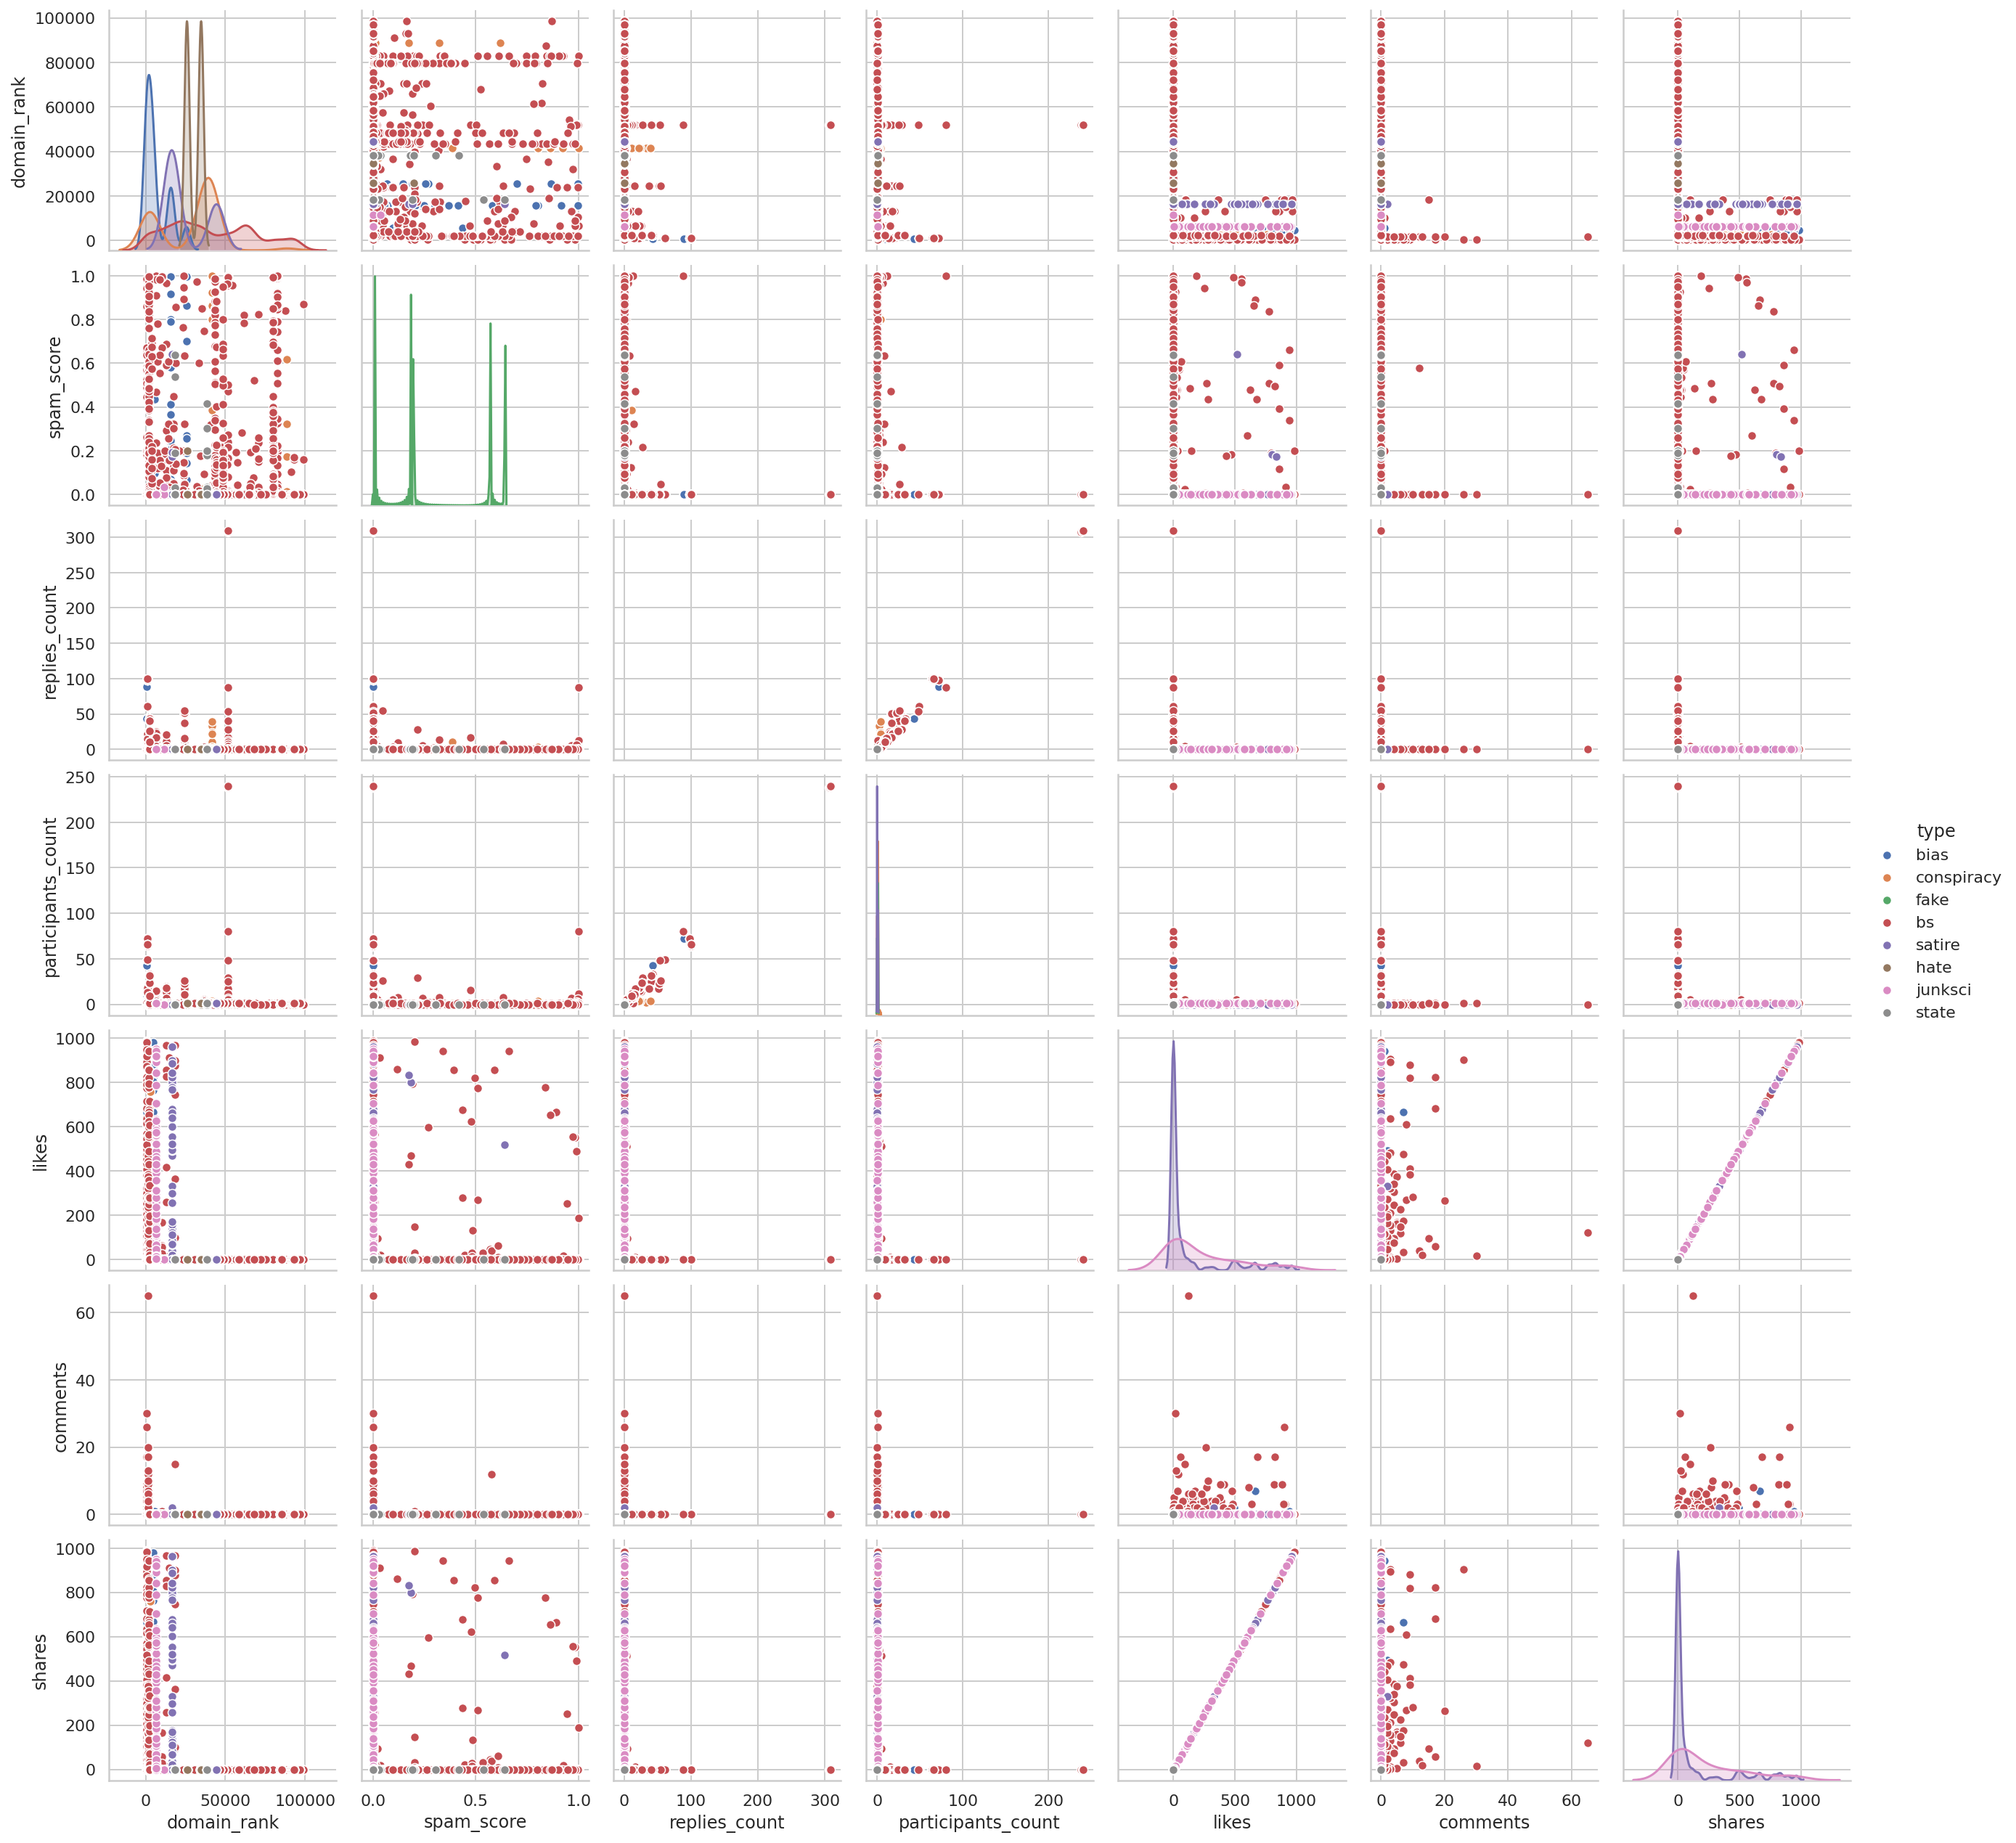

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

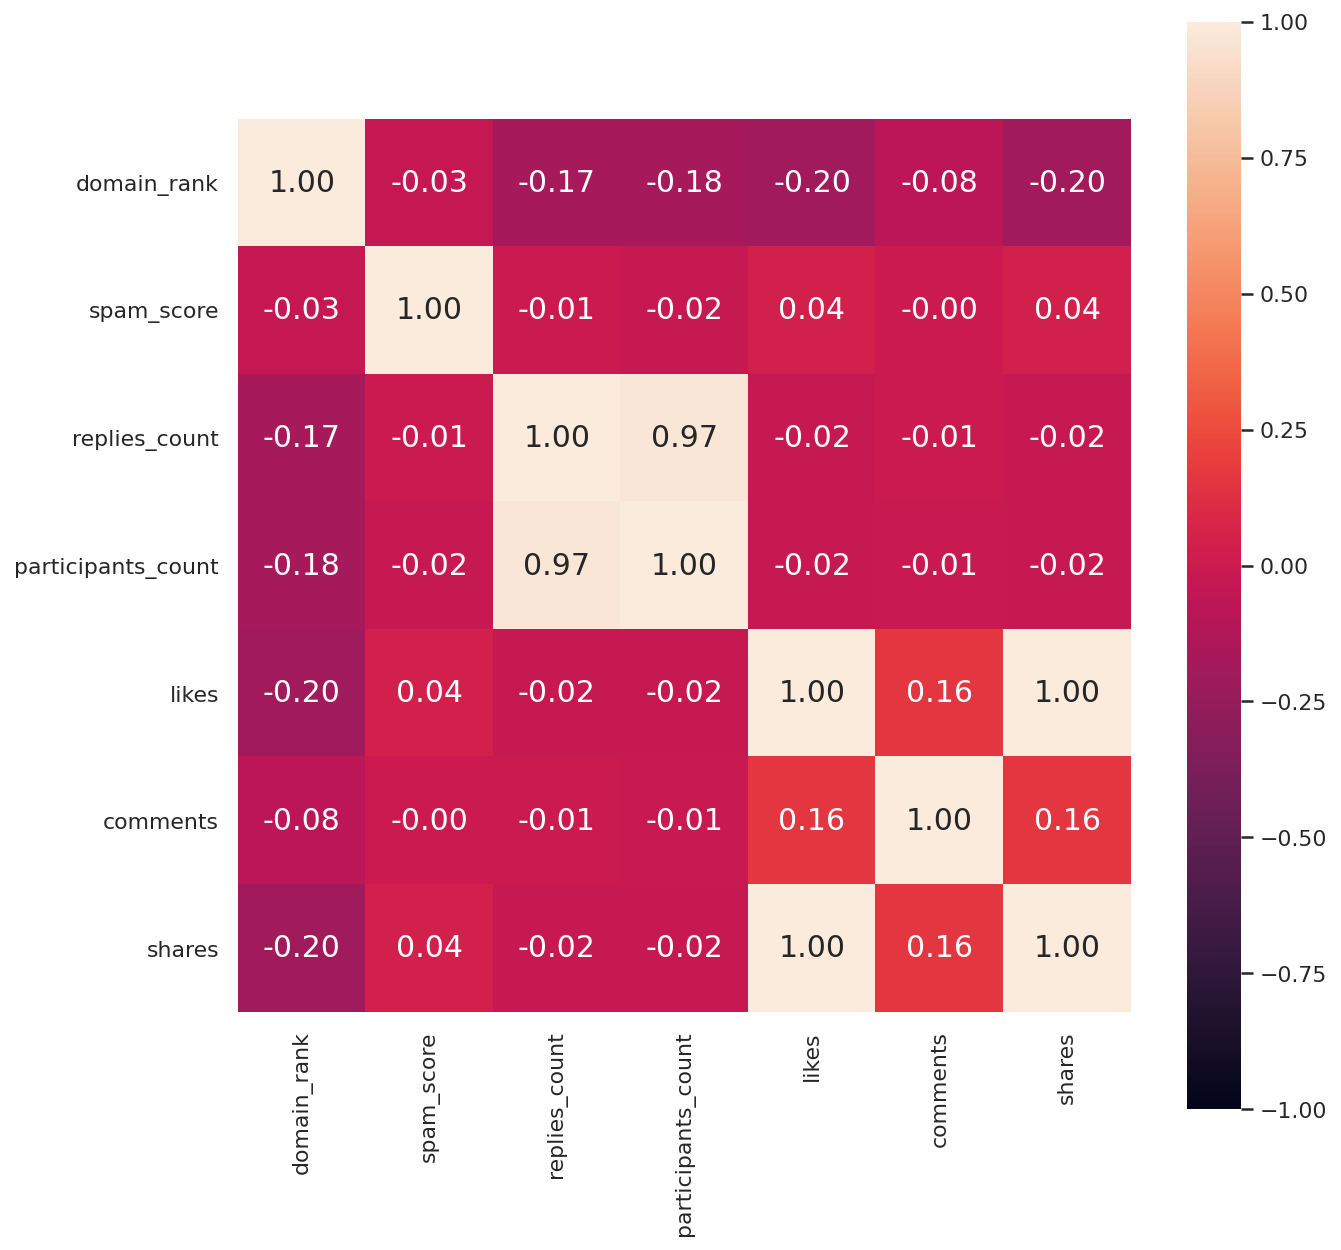

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)